In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
from copy import deepcopy

sns.set_style("darkgrid")

pd.set_option('max_columns', 50)

sns.set(rc={'figure.figsize':(15,10)})

In [27]:
np.arange(0, 2)

array([0, 1])

In [2]:
def excel_selection_to_numpy(selection_string):
    selection_string_by_row = selection_string.split('  ')
    
    selection_string_by_row_list = []
    for row in selection_string_by_row:
        row_by_value = row.split('\t')
        selection_string_by_row_list.append(row_by_value)
        
    return np.array(selection_string_by_row_list).astype(np.float64)

In [3]:
columns = [50, 100, 250, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000, 100000]
index =  [
           'Titanic (n=9)', 
           'Medical Insurance (n=9)', 
           'Brest Cancer Wisconsin (n=9)', 
           'Wisconsin Diagnostic Breast Cancer (n=10)',  
           'Heart Disease (n=13)',                       
           'Cervical Cancer (n=15)',                     
           'Loan House (n=16)',                          
           'Credit Card (n=23)', 
          ]


multi_distrib_sampling_results = excel_selection_to_numpy('0.64	0.67	0.66	0.71	0.76	0.77	0.71	0.73	0.78	0.74	0.6	0.75  0.77	0.78	0.61	0.83	0.76	0.75	0.88	0.81	0.85	0.86	0.89	0.85  0.58	0.65	0.76	0.7	0.78	0.8	0.84	0.74	0.73	0.82	0.74	0.71  0.75	0.45	0.72	0.72	0.61	0.66	0.56	0.56	0.63	0.64	0.62	0.57  0.69	0.72	0.68	0.66	0.84	0.73	0.75	0.74	0.77	0.78	0.72	0.78  0.45	0.63	0.71	0.57	0.62	0.53	0.65	0.66	0.75	0.65	0.73	0.61  0.62	0.73	0.8	0.7	0.81	0.92	0.77	0.75	0.85	0.93	0.74	0.91  0.57	0.58	0.49	0.53	0.62	0.68	0.69	0.76	0.71	0.75	0.68	0.7')
standard_uniform_results = excel_selection_to_numpy('0.67	0.72	0.7	0.77	0.83	0.87	0.86	0.87	0.87	0.87	0.87	0.88  0.69	0.68	0.73	0.81	0.84	0.88	0.89	0.92	0.92	0.91	0.91	0.92  0.56	0.62	0.72	0.8	0.77	0.48	0.39	0.36	0.32	0.34	0.32	0.32  0.6	0.43	0.58	0.44	0.46	0.37	0.38	0.34	0.36	0.36	0.29	0.38  0.71	0.78	0.75	0.8	0.84	0.85	0.86	0.86	0.85	0.85	0.87	0.87  0.68	0.58	0.65	0.68	0.75	0.71	0.72	0.78	0.75	0.77	0.79	0.81  0.61	0.6	0.68	0.71	0.83	0.89	0.97	1	1	1	1	1  0.48	0.44	0.51	0.66	0.69	0.74	0.75	0.75	0.75	0.75	0.75	0.75')
standard_normal_results = excel_selection_to_numpy('0.6	0.64	0.69	0.72	0.75	0.85	0.86	0.85	0.83	0.88	0.85	0.88  0.56	0.73	0.62	0.64	0.75	0.9	0.91	0.89	0.89	0.91	0.85	0.88  0.38	0.48	0.39	0.37	0.45	0.4	0.32	0.34	0.37	0.32	0.32	0.39  0.6	0.42	0.46	0.45	0.51	0.34	0.33	0.37	0.35	0.31	0.34	0.38  0.69	0.76	0.79	0.78	0.7	0.74	0.8	0.82	0.79	0.8	0.82	0.82  0.58	0.51	0.52	0.57	0.47	0.49	0.61	0.36	0.34	0.42	0.28	0.35  0.78	0.69	0.87	0.68	0.87	0.87	0.6	0.69	0.56	0.78	0.81	0.84  0.52	0.41	0.6	0.55	0.71	0.56	0.34	0.5	0.6	0.54	0.55	0.64')

multi_distrib_sampling_results_df = pd.DataFrame(data=multi_distrib_sampling_results[:,:-1], 
                                                 index=index, 
                                                 columns =columns[:-1]).T

standard_uniform_results_df = pd.DataFrame(data=standard_uniform_results[:,:-1], 
                                                 index=index, 
                                                 columns =columns[:-1]).T

standard_normal_results_df = pd.DataFrame(data=standard_normal_results[:,:-1], 
                                                 index=index, 
                                                 columns =columns[:-1]).T




<AxesSubplot:>

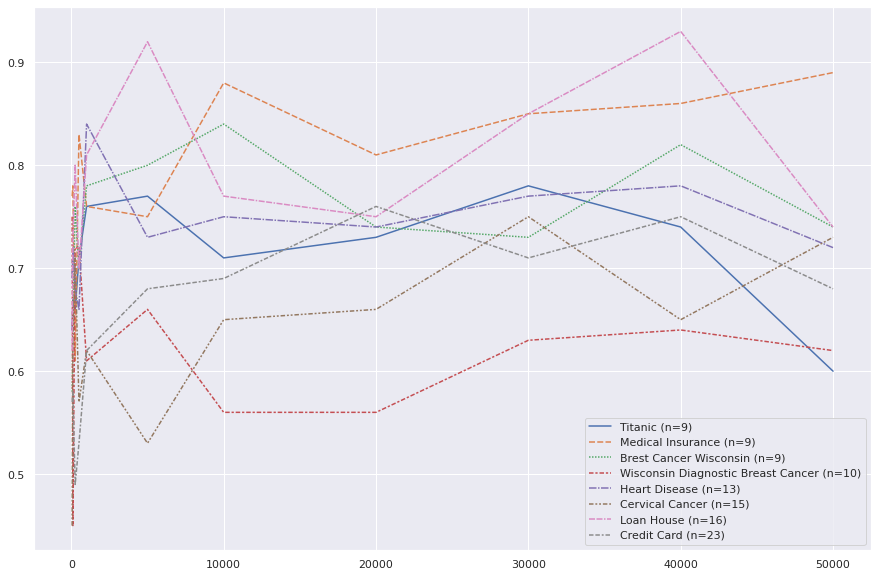

In [4]:
sns.lineplot(data=multi_distrib_sampling_results_df)

<AxesSubplot:>

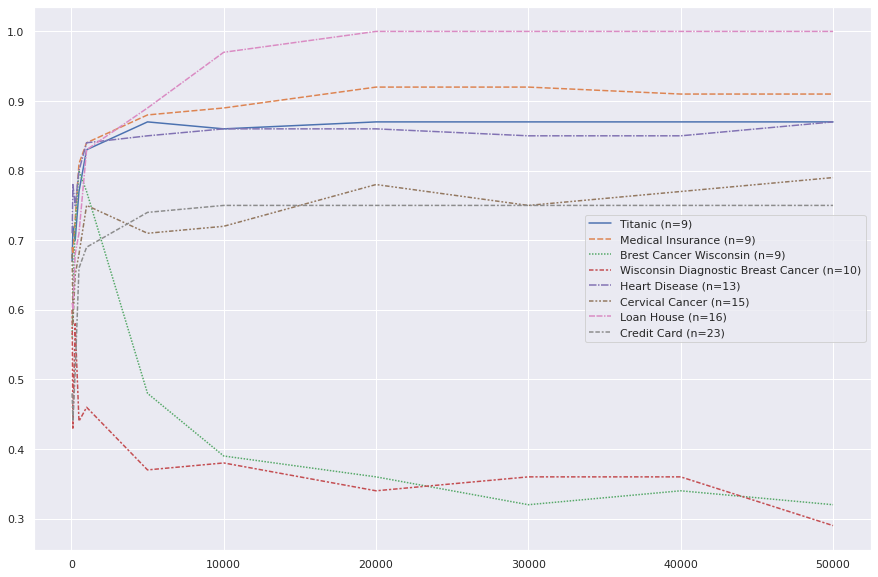

In [5]:
sns.lineplot(data=standard_uniform_results_df)

<AxesSubplot:>

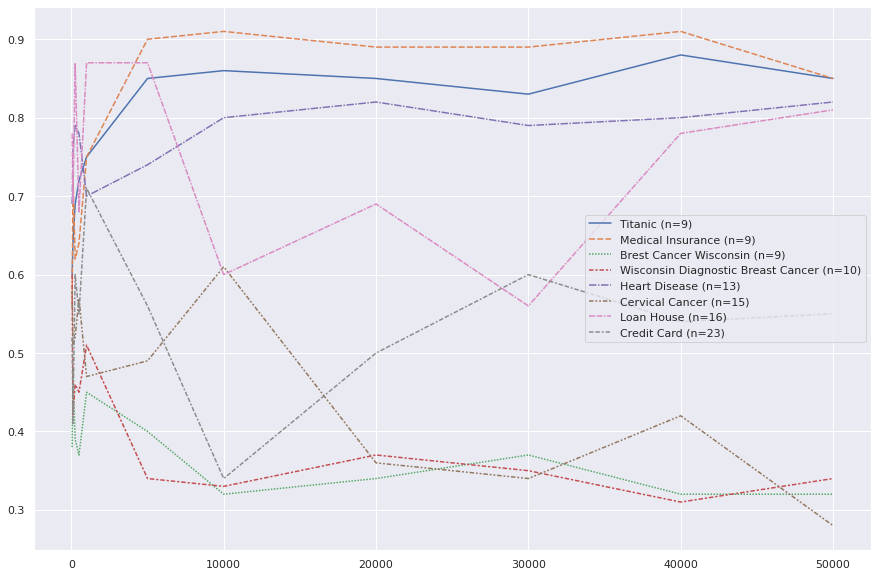

In [6]:
sns.lineplot(data=standard_normal_results_df)

,multi_distrib_sampling,standard_uniform,standard_normal
50,0.63375,0.62500,0.58875
100,0.65125,0.60625,0.58000
250,0.67875,0.66500,0.61750
500,0.67750,0.70875,0.59500
1000,0.72500,0.75125,0.65125


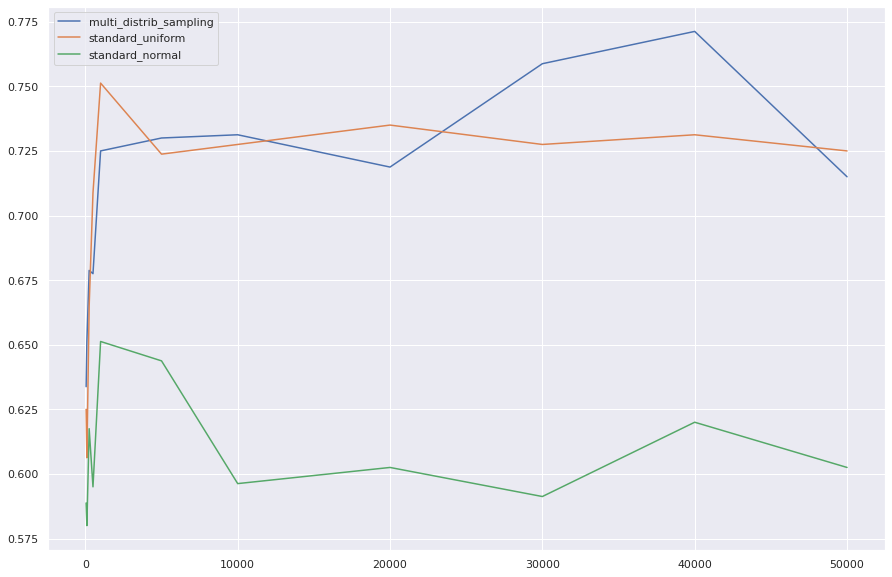

In [7]:
index_mean = ['multi_distrib_sampling', 'standard_uniform', 'standard_normal']
results_mean = np.array([multi_distrib_sampling_results_df.mean(axis=1).values,
                         standard_uniform_results_df.mean(axis=1).values,
                         standard_normal_results_df.mean(axis=1).values])

results_mean_df = pd.DataFrame(data=results_mean, 
                                                 index=index_mean, 
                                                 columns=columns[:-1]).T
display(results_mean_df.head())

plot = sns.lineplot(data=results_mean_df, dashes=False, palette=sns.color_palette()[:3])


,multi_distrib_sampling,standard_uniform,standard_normal
50,0.63375,0.62500,0.58875
100,0.65125,0.60625,0.58000
250,0.67875,0.66500,0.61750
500,0.67750,0.70875,0.59500
1000,0.72500,0.75125,0.65125


[[Text(100, 0, '100'),
  Text(1000, 0, '1000'),
  Text(10000, 0, '10000'),
  Text(50000, 0, '50000')]]

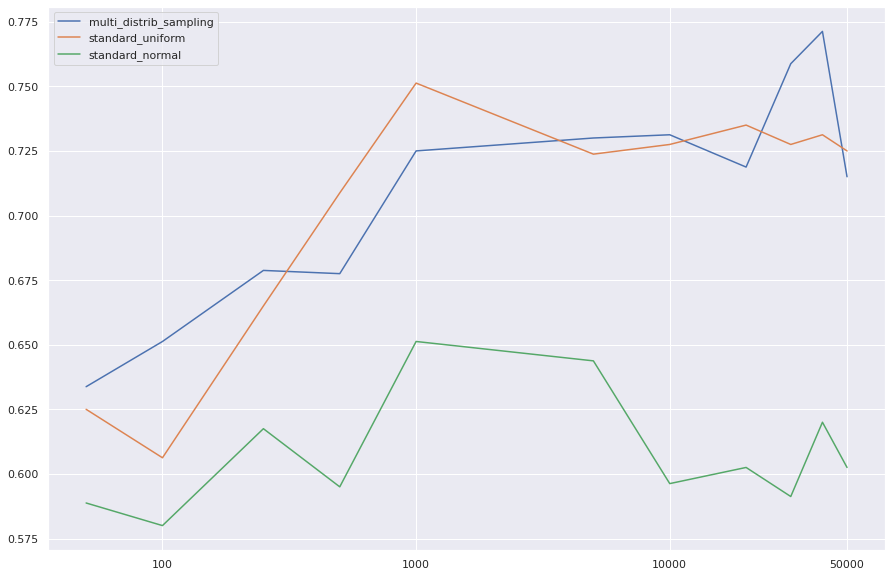

In [26]:
index_mean = ['multi_distrib_sampling', 'standard_uniform', 'standard_normal']
results_mean = np.array([multi_distrib_sampling_results_df.mean(axis=1).values,
                         standard_uniform_results_df.mean(axis=1).values,
                         standard_normal_results_df.mean(axis=1).values])

results_mean_df = pd.DataFrame(data=results_mean, 
                                                 index=index_mean, 
                                                 columns=columns[:-1]).T
display(results_mean_df.head())

plot = sns.lineplot(data=results_mean_df, dashes=False, palette=sns.color_palette()[:3])
plot.set(xscale='log')

#log_columns = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]
#log_columns = [50, 100, 1000, 10000, 50000]
log_columns = [100, 1000, 10000, 50000]
#plot.set(xlim=(50, None))
plot.set(xticks=log_columns)
plot.set(xticklabels=log_columns)